In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os

In [3]:
#preparing the data i.e retreaving the images and their labels from the data sets
df = []
labels =[]
classes = 43
cpath = os.getcwd()
for i in range(classes):
    path = os.path.join(cpath,'Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            df.append(image)
            labels.append(i)
        except: 
            print("Error Loading image")
    
        
data = np.array(df)
labels = np.array(labels)
    

In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


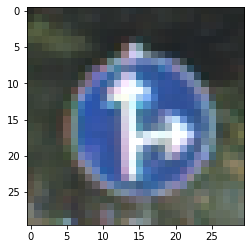

In [16]:
plt.imshow(X_train[0])

In [18]:
#one hot encoding the variables
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 77s 77ms/step - loss: 1.9066 - accuracy: 0.5246 - val_loss: 0.4394 - val_accuracy: 0.8896
Epoch 2/15
981/981 [==============================] - 81s 82ms/step - loss: 0.6721 - accuracy: 0.8032 - val_loss: 0.2775 - val_accuracy: 0.9313
Epoch 3/15
981/981 [==============================] - 91s 93ms/step - loss: 0.4684 - accuracy: 0.8620 - val_loss: 0.1238 - val_accuracy: 0.9635
Epoch 4/15
981/981 [==============================] - 78s 80ms/step - loss: 0.3796 - accuracy: 0.8872 - val_loss: 0.1426 - val_accuracy: 0.9577
Epoch 5/15
981/981 [==============================] - 76s 77ms/step - loss: 0.3368 - accuracy: 0.9020 - val_loss: 0.1189 - val_accuracy: 0.9640
Epoch 6/15
981/981 [==============================] - 76s 77ms/step - loss: 0.3346 - accuracy: 0.9027 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 7/15
981/981 [==============================] - 73s 74ms/step - loss: 0.2957 - accuracy: 0.9159 - val_loss: 0.0857 - val_accuracy:

In [24]:
model.save("my_model.h5")

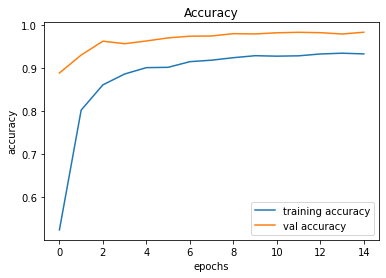

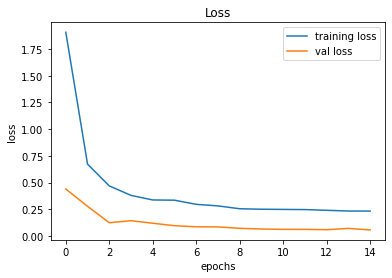

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels. We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data.

In [26]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [28]:
pred = np.argmax(model.predict(X_test),axis=-1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.94      0.98      0.96       720
           2       0.94      0.98      0.96       750
           3       0.95      0.96      0.95       450
           4       0.98      0.95      0.96       660
           5       0.93      0.92      0.92       630
           6       0.97      0.83      0.90       150
           7       0.98      0.95      0.97       450
           8       0.94      0.96      0.95       450
           9       0.92      0.94      0.93       480
          10       0.94      0.97      0.96       660
          11       0.94      0.96      0.95       420
          12       0.98      0.96      0.97       690
          13       0.97      0.99      0.98       720
          14       1.00      0.99      1.00       270
          15       0.96      0.93      0.95       210
          16       0.96      0.99      0.97       150
          17       1.00    

In [35]:
(confusion_matrix(labels,pred))

array([[ 54,   1,   0, ...,   0,   0,   0],
       [  0, 706,   3, ...,   0,   0,   0],
       [  0,   2, 733, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  29,   0],
       [  0,   0,   0, ...,   0,   0,  84]], dtype=int64)

In [36]:
print(accuracy_score(labels,pred)*100)

94.4972288202692
